In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import warnings
warnings.simplefilter(action='ignore')

## Lecture 11

## `join()` vs `with_column()`

### Example 1: Sections

In [2]:
sections = Table().with_columns('Section No', [1,2,3,4,5,6], 
                                'Room', ['PHELP 2514', 'PHELP 2514', 'PHELP 2514', 'GIRV 1115', 'PHELP 1440', 'PHELP 1445'])
sections

Section No,Room
1,PHELP 2514
2,PHELP 2514
3,PHELP 2514
4,GIRV 1115
5,PHELP 1440
6,PHELP 1445


In [3]:
ulas = ['Caden', 'Gianmarco', 'Jai', 'Justin', 'Christian', 'Anushka']
tas  = []
sections.with_column('ula', ulas)

Section No,Room,ula
1,PHELP 2514,Caden
2,PHELP 2514,Gianmarco
3,PHELP 2514,Jai
4,GIRV 1115,Justin
5,PHELP 1440,Christian
6,PHELP 1445,Anushka


In [4]:
rooms = ['PHELP 2514', 'GIRV 1115', 'PHELP 1440', 'PHELP 1445']
url = []
capacity = [35, 48, 35, 35]
renovation = [2018, 2017, 2018, 2018]
Table().with_columns('room', rooms, 'capacity', capacity, 'renovated', renovation)

room,capacity,renovated
PHELP 2514,35,2018
GIRV 1115,48,2017
PHELP 1440,35,2018
PHELP 1445,35,2018


### Example 2: Flights

In [6]:
def distance(lat1, lon1, lat2, lon2):
    # Havesine Formula
    r_earth = 4000 #miles
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(lon1)
    lat2 = np.deg2rad(lat2)
    lon2 = np.deg2rad(lon2)
    
    distance = np.arccos(np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1)) * r_earth
    return distance

In [18]:
flights = Table.read_table('data/flights.csv').select('carrier', 'flight', 'origin', 'air_time', 'dest')
airports = Table.read_table('data/airports.csv').select('faa', 'lat', 'lon')

**Tasks**
We want to get the distribution of the airspeeds

- join the airports with the flight data to get location information about origin and destination location
    - We need to join the airport table twice; 
    - therefore we should create two copies of the airports table with distinct labels
- apply the havesine formula to get an approximation of the distances between origin and destinations
- calculate the speed
- create a histogram

---
Back to slides

---

## Bike Sharing ##

In [36]:
trip = Table.read_table('data/trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


## Distribution of Durations ##

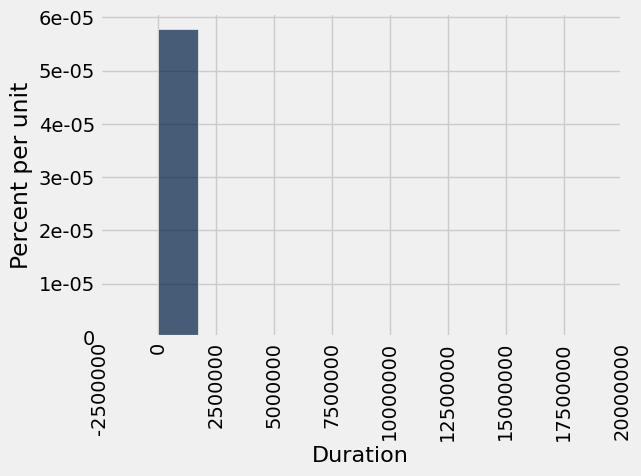

In [37]:
trip.hist('Duration')

**Question** What is going on??

In [38]:
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


**Task** 
- Let's find trips that were shorter than 30 minutes and create a histogram of those
- Let's set the bins to 5 minute bins and add a unit

**Question**
What share of trips was between 5 and 10 minutes?
- eyeball from reading the histogram
- find the exact value (using table functions)

In [2]:
# Eyeball:


In [1]:
# Exact:


## Start and End Stations 
- How many (start) stations are there?
- let's find the most common start station

**Tasks**

let's
- find the count of trips between each station combination
    - Why do we have a trip count of 0 for some of the combinations?
    - Is it plausible that there are trips that start and stop at the same station? 
- find the average trip time between each station
    - The average might be skewed by people taking a long time because they e.g. got food on the way. 
    - How could we find the typical trip time between each station? 
    - Or maybe the fastest?

**Question:** Should we use `group()` or `pivot()`?

## Discussion question
Find the 5 stations closest to Civic Center BART by minimum trip time.

Things you need to do:
- find all the trips that start at `Civic Center Bart`
- find the shortest trip between stations
- optionally, subset the dataset to only the relevant columns

## Maps 
Geographical data on the stations


In [50]:
stations = Table.read_table('data/station.csv').drop(4, 6)
stations

station_id,name,lat,long,landmark
2,San Jose Diridon Caltrain Station,37.3297,-121.902,San Jose
3,San Jose Civic Center,37.3307,-121.889,San Jose
4,Santa Clara at Almaden,37.334,-121.895,San Jose
5,Adobe on Almaden,37.3314,-121.893,San Jose
6,San Pedro Square,37.3367,-121.894,San Jose
7,Paseo de San Antonio,37.3338,-121.887,San Jose
8,San Salvador at 1st,37.3302,-121.886,San Jose
9,Japantown,37.3487,-121.895,San Jose
10,San Jose City Hall,37.3374,-121.887,San Jose
11,MLK Library,37.3359,-121.886,San Jose


In [69]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations.select('lat', 'long', 'name').relabeled('name', 'labels'))
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [70]:
Marker.map_table(sf_stations_map_data)

In [32]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

## Example Questions

For each of the following, write a Python expression that returns the given data:

1. The name of the station where most rentals ended

2. The number of stations for which the average duration of trips ending at that station was more than 10 minutes

3. The number of stations that have more than 500 starts and more than 500 ends.